# Assignment 3
### Phyllis Kho

## 1 Creating and Manipulating Arrays
First import numpy and matplotlib

In [469]:
import numpy as np
import matplotlib as mpl

## 1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan
Both should cover the range (-2, 2) and have 100 points in each direction

In [470]:
# Create 1D arrays for x and y 

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

# Use np.meshgrid to create a 2D array

xx,yy = np.meshgrid(x, y)

## 1.2. Visualize each 2D array using pcolormesh
Use the correct coordiantes for the x and y axes

In [471]:
# import pyplot as plt

from matplotlib import pyplot as plt

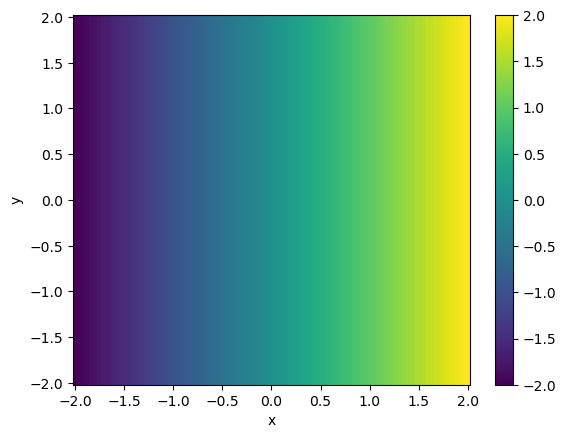

In [525]:
# Visualize xx

plt.pcolormesh(x, y, xx, vmin = -2, vmax = 2);
plt.colorbar();
plt.xlabel('x');
plt.ylabel('y');

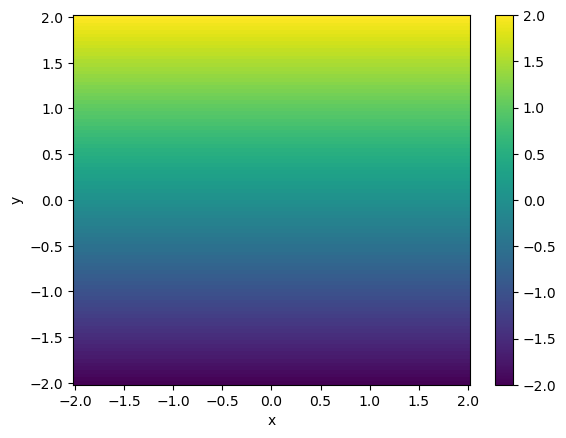

In [526]:
# Visualize yy

plt.pcolormesh(x, y, yy, vmin = -2, vmax = 2);
plt.colorbar();
plt.xlabel('x');
plt.ylabel('y');

## 1.3 From your cartesian coordinates, create polar coordinates r
 and phi. Refer to the wikipedia page for the conversion formula. You will need to use numpy’s arctan2 function. Read its documentation.

In [474]:
# From Wikipedia, r = (x**2 + y**2)**0.5
# Converting xx and yy arrays to polar coordinate r:

r = ((xx**2 + yy**2)**0.5)

In [475]:
# From Wikipedia, phi = atan2(y, x)
# Converting xx and yy arrays to polar coordinate phi:

phi = np.arctan2(yy, xx)

## 1.4. Visualize r and phi on the 2D x/y plane using pcolormesh

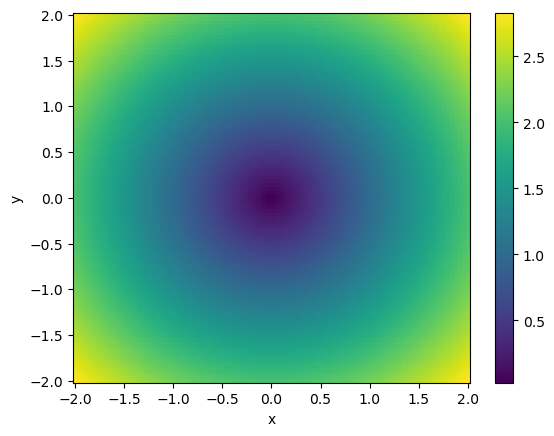

In [527]:
# Visualize r on the x-y plane

plt.pcolormesh(x, y, r);
plt.colorbar();
plt.xlabel('x');
plt.ylabel('y');

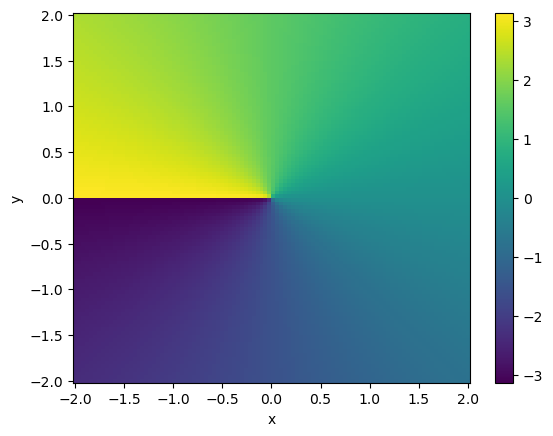

In [528]:
# Visualize phi on the x-y plane

plt.pcolormesh(x, y, phi);
plt.colorbar();
plt.xlabel('x');
plt.ylabel('y');

## 1.5 Calculate the quantity f = cos^2(4r) + sin^s(4phi)
And plot it on the x/y plane

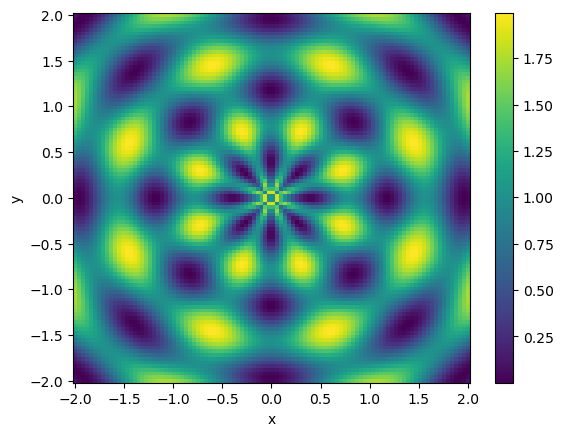

In [529]:
f = np.cos(4*r)**2 + np.sin(4*phi)**2

# Visualizing f on the x-y plane

plt.pcolormesh(x, y, f);
plt.colorbar();
plt.xlabel('x');
plt.ylabel('y');

## 1.6 Plot the mean of f with respect to the x axis
as a function of y

In [479]:
# Calculate mean of f with respect to x-axis (across a row):
f_mean_x = np.mean(f, axis = 1)

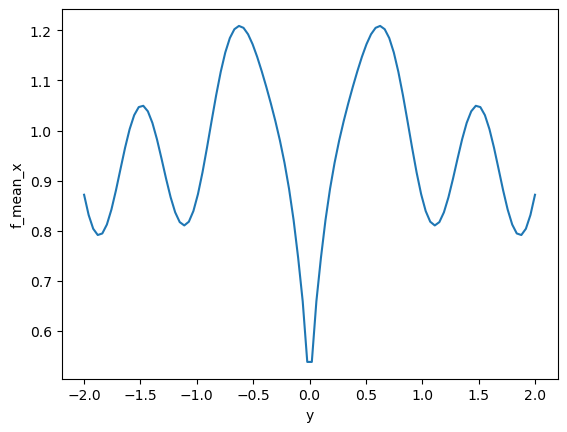

In [523]:
# Plot y on the x-axis and f_mean_x on y-axis
plt.plot(y, f_mean_x);
plt.xlabel('y');
plt.ylabel('f_mean_x');

## 1.7 Plot the mean of f with respect to the y axis
as a function of x

In [481]:
# Calculate mean of f with respect to y-axis (in a column):

f_mean_y = np.mean(f, axis=0)

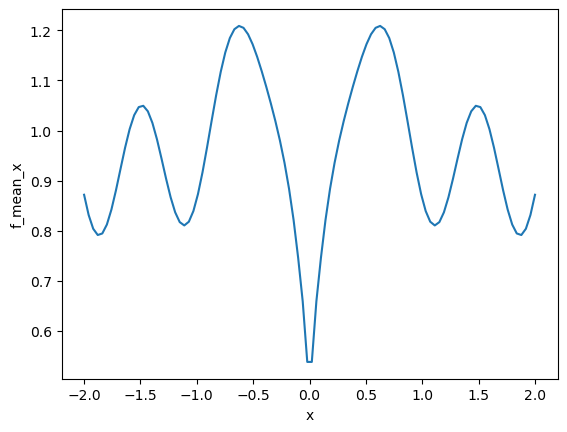

In [524]:
# Plot x on the x-axis and f_mean_y on y-axis

plt.plot(x, f_mean_y);
plt.xlabel('x');
plt.ylabel('f_mean_x');

## 1.8 Plot the mean of f with respect to phi as a function of r
This is hard. You will need to define a discrete range of 
 values and then figure out how to average f
 within the bins defined by your r
 grid. There are many different ways to accomplish this.

In [486]:
# Define a discrete range of values for r
r_values = np.linspace(0, 2*np.sqrt(2), 100)

In [487]:
# Define a range of values for phi
phi_values = np.linspace(-(np.pi), np.pi, 100)

In [488]:
# Define a function that calculates f given r and phi values

def calculate_f(r_values, phi_values):
    """Calculate f with r and phi inputs."""
    f = np.cos(4*r_values)**2 + np.sin(4*phi_values)**2
    return f

In [489]:
# Create a 100 x 100 2D meshgrid for f_values
r_grid, phi_grid = np.meshgrid(r_values, phi_values)

In [490]:
# Calculate f_values for given r_values and phi_values
f_values = calculate_f(r_grid, phi_grid)

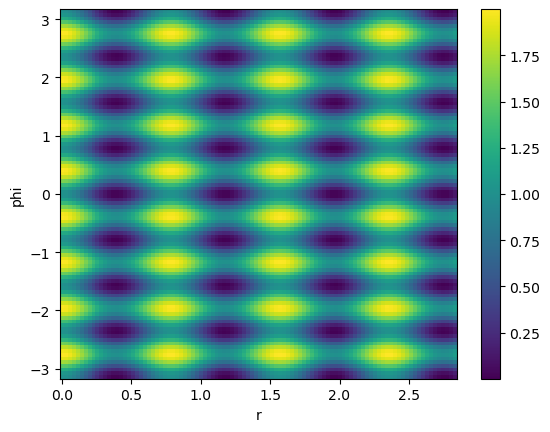

In [491]:
plt.pcolormesh(r_values, phi_values, f_values);
plt.colorbar();
plt.xlabel('r');
plt.ylabel('phi');

## Part 2: Analyze ARGO Data

You can use whatever names you want for your arrays, but I recommend

T: temperature

S: salinity

P: pressure

date: date

lat: latitude

lon: longitude

level: depth level

Note: you have to actually look at the file name (the items in files) to know which files corresponds to which variable.

In [492]:
# Download data files

import pooch
url = "https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash="2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009")
files

['/home/pyk2106/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy',
 '/home/pyk2106/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy',
 '/home/pyk2106/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy',
 '/home/pyk2106/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy',
 '/home/pyk2106/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy',
 '/home/pyk2106/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy',
 '/home/pyk2106/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy']

In [493]:
# Create arrays from downloaded .npy files

T = np.load('/home/pyk2106/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy')
S = np.load('/home/pyk2106/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy')
P = np.load('/home/pyk2106/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy')
date = np.load('/home/pyk2106/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy')
lat = np.load('/home/pyk2106/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy')
lon = np.load('/home/pyk2106/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy')
level = np.load('/home/pyk2106/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy')

## 2.2 Examine the shapes of T, S and P compared to lon, lat, date and level. How do you think they are related?
Based on the shapes, which dimensions do you think are shared among the arrays?



In [494]:
T.shape

(78, 75)

In [495]:
S.shape

(78, 75)

In [496]:
T.shape

(78, 75)

In [497]:
lon.shape

(75,)

In [498]:
lat.shape

(75,)

In [499]:
date.shape

(75,)

In [500]:
level.shape

(78,)

T, S and P are 2D arrays with 78 rows and 75 columns. 
lat, lon and date are 1D arrays that have 75 rows. 
level is a 1D array with 78 rows.

The rows in T, S, and P arrays correspond to level data as all four arrays have the same number of rows.
The columns in T, S, and P arrays are associated with lat, lon and date as T, S, and P have 75 rows while lat, lon and date has 75 columns.


## 2.3 Make a plot for each column of data in T, S and P (three plots).
The vertical scale should be the levels data. Each plot should have a line for each column of data. It will look messy.

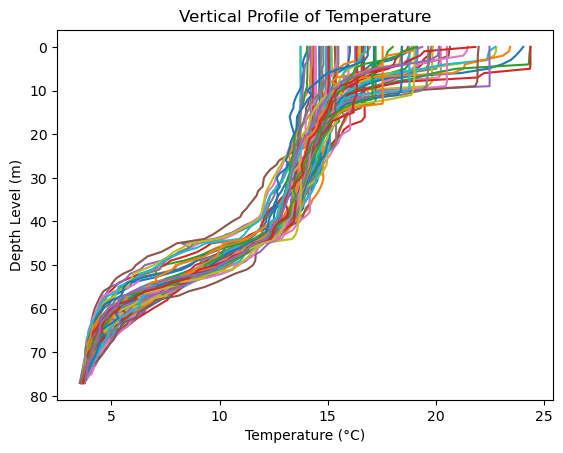

In [501]:
# Vertical profile of temperature
plt.title("Vertical Profile of Temperature")
plt.plot(T, level);
plt.gca().invert_yaxis();
plt.xlabel('Temperature (°C)');
plt.ylabel('Depth Level (m)');

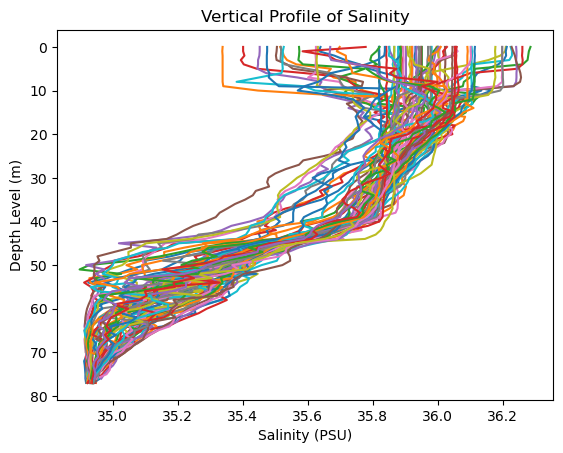

In [502]:
# Vertical profile of salinity

plt.title("Vertical Profile of Salinity")
plt.plot(S, level);
plt.gca().invert_yaxis();
plt.xlabel('Salinity (PSU)');
plt.ylabel('Depth Level (m)');

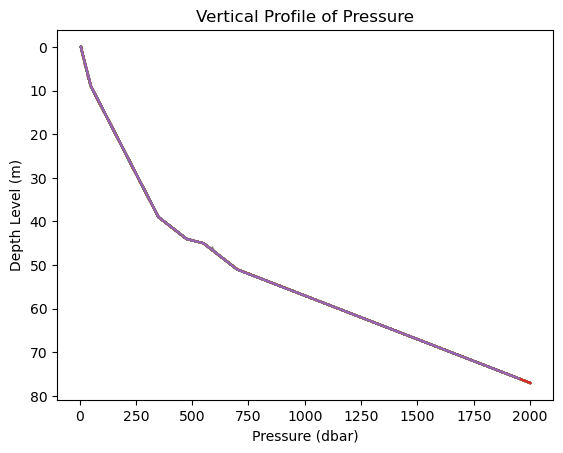

In [503]:
# Vertical profile of pressure

plt.title("Vertical Profile of Pressure")
plt.plot(P, level);
plt.gca().invert_yaxis();
plt.xlabel('Pressure (dbar)');
plt.ylabel('Depth Level (m)');

## 2.4 Compute the mean and standard deviation of each of T, S and P at each depth in level.

In [504]:
# Calculate mean T at each depth in level

T_mean = np.mean(T, axis = 1)

In [505]:
# Calculate standard deviation of T at each depth in level

T_std = np.std(T, axis = 1)

In [506]:
# Calculate mean S at each depth in level

S_mean = np.mean(S, axis = 1)

In [507]:
# Calculate standard deviation of S at each depth in level

S_std = np.std(S, axis = 1)

In [508]:
# Calculate mean P at each depth in level

P_mean = np.mean(P, axis = 1)

In [509]:
# Calculate standard deviation of P at each depth in level

P_std = np.std(P, axis=1)

## 2.5 Now make three similar plot, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations.

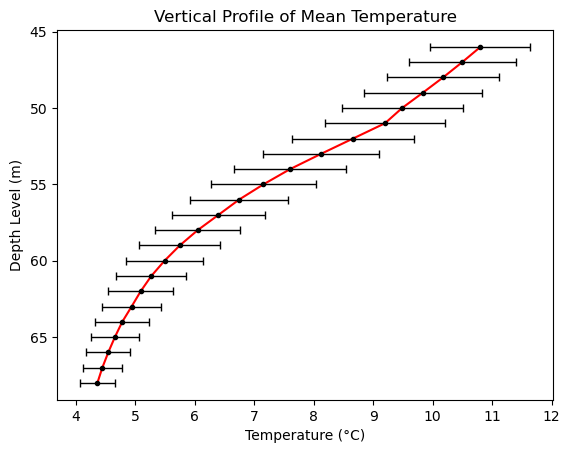

In [510]:
# Vertical profile of mean temperature

plt.title("Vertical Profile of Mean Temperature")
plt.plot(T_mean, level, color = 'red');
plt.gca().invert_yaxis();
plt.errorbar(T_mean, level, xerr = T_std, capsize = 3, elinewidth = 1, fmt ='o', markersize = 3, ecolor = 'black', markerfacecolor = 'black', markeredgecolor = 'black');
plt.xlabel('Temperature (°C)');
plt.ylabel('Depth Level (m)');


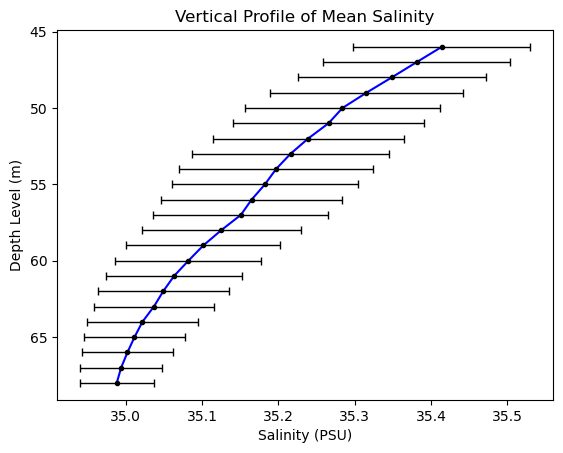

In [511]:
# Vertical profile of mean salinity

plt.title("Vertical Profile of Mean Salinity")
plt.plot(S_mean, level, color = 'blue');
plt.gca().invert_yaxis();
plt.errorbar(S_mean, level, xerr = S_std, capsize = 3, elinewidth = 1, fmt ='o', markersize = 3, ecolor = 'black', markerfacecolor = 'black', markeredgecolor = 'black');
plt.xlabel('Salinity (PSU)');
plt.ylabel('Depth Level (m)');

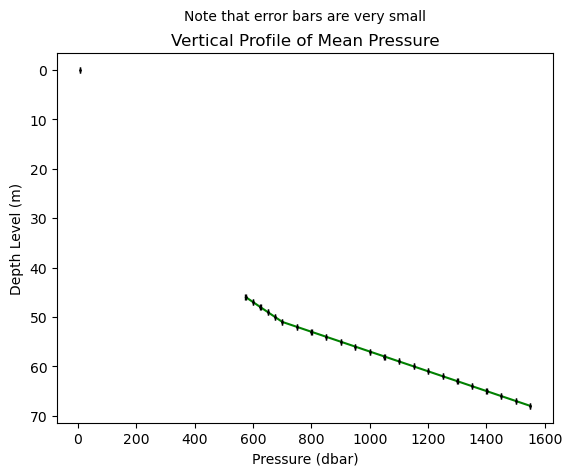

In [512]:
# Vertical profile of mean pressure

plt.title("Vertical Profile of Mean Pressure")
plt.text(0.5, 1.1, "Note that error bars are very small", fontsize=10, ha='center', va='center', transform=plt.gca().transAxes)
plt.plot(P_mean, level, color = 'green');
plt.gca().invert_yaxis();
plt.errorbar(P_mean, level, xerr = P_std, capsize = 2, elinewidth = 1, fmt ='o', markersize = 1, ecolor = 'black', markerfacecolor = 'black', markeredgecolor = 'black');
plt.xlabel('Pressure (dbar)');
plt.ylabel('Depth Level (m)');

## 2.6 Account For Missing Data
The profiles contain many missing values. These are indicated by the special “Not a Number” value, or np.nan.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes NaN. Instead, if you use the special functions np.nanmean and np.nanstd, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

In [513]:
# Calculate mean T ignoring NaNs at each depth in level

T_nanmean = np.nanmean(T, axis = 1)

In [514]:
# Calculate standard deviation of T ignoring NaNs at each depth in level

T_nanstd = np.nanstd(T, axis = 1)

In [515]:
# Calculate mean S ignoring NaNs at each depth in level

S_nanmean = np.nanmean(S, axis = 1)

In [516]:
# Calculate standard deviation of S ignoring NaNs at each depth in level

S_nanstd = np.nanstd(S, axis = 1)

In [517]:
# Calculate mean P ignoring NaNs at each depth in level

P_nanmean = np.nanmean(P, axis = 1)

In [518]:
# Calculate standard deviation of P ignoring NaNs at each depth in level

P_nanstd = np.nanstd(P, axis = 1)

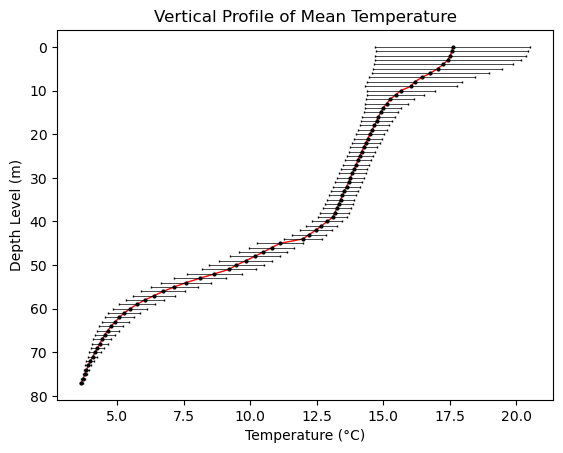

In [519]:
# Vertical profile of mean temperature ignoring NaNs

plt.title("Vertical Profile of Mean Temperature")
plt.plot(T_nanmean, level, color = 'red', linewidth = '1');
plt.gca().invert_yaxis();
plt.errorbar(T_nanmean, level, xerr = T_nanstd, capsize = 1, elinewidth = 0.5, fmt ='o', markersize = 2, ecolor = 'black', markerfacecolor = 'black', markeredgecolor = 'black');
plt.xlabel('Temperature (°C)');
plt.ylabel('Depth Level (m)');

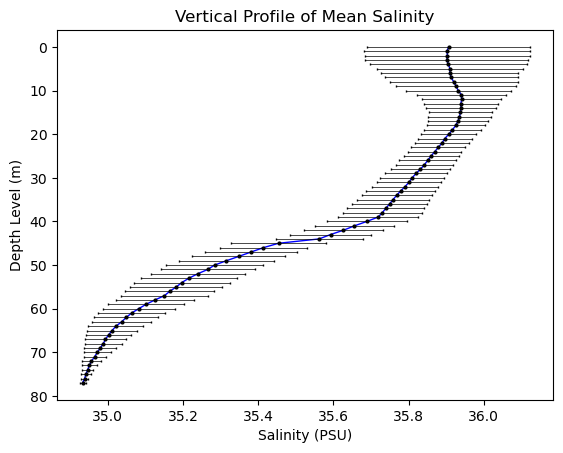

In [520]:
# Vertical profile of mean salinity ignoring NaNs

plt.title("Vertical Profile of Mean Salinity")
plt.plot(S_nanmean, level, color = 'blue', linewidth = '1');
plt.gca().invert_yaxis();
plt.errorbar(S_nanmean, level, xerr = S_nanstd, capsize = 1, elinewidth = 0.5, fmt ='o', markersize = 2, ecolor = 'black', markerfacecolor = 'black', markeredgecolor = 'black');
plt.xlabel('Salinity (PSU)');
plt.ylabel('Depth Level (m)');

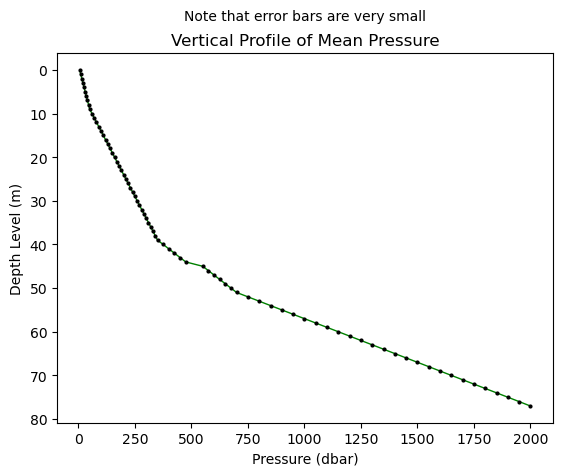

In [521]:
# Vertical profile of mean pressure ignoring NaNs

plt.title("Vertical Profile of Mean Pressure")
plt.text(0.5, 1.1, "Note that error bars are very small", fontsize=10, ha='center', va='center', transform=plt.gca().transAxes)
plt.plot(P_nanmean, level, color = 'green', linewidth = '1');
plt.gca().invert_yaxis();
plt.errorbar(P_nanmean, level, xerr = P_nanstd, capsize = 1, elinewidth = 0.5, fmt ='o', markersize = 2, ecolor = 'black', markerfacecolor = 'black', markeredgecolor = 'black');
plt.xlabel('Pressure (dbar)');
plt.ylabel('Depth Level (m)');

## 2.7 Create a scatter plot of the lon, lat positions of the ARGO float.
Use the plt.scatter function.

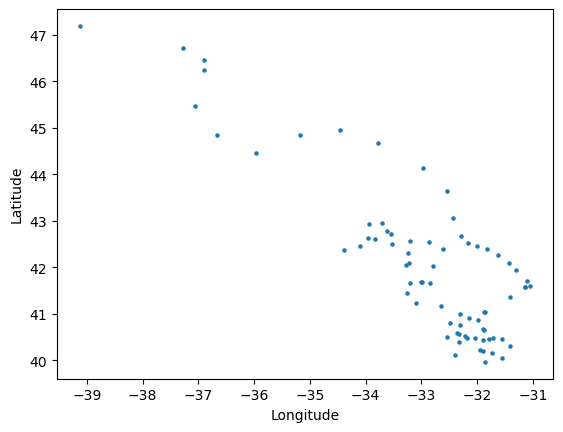

In [531]:
plt.scatter(lon, lat, s = 5);
plt.xlabel('Longitude');
plt.ylabel('Latitude');